# LARS Algorithm for Predicting Wine Taste

In [1]:
import numpy as np
from sklearn import datasets, linear_model
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import seaborn as sns

sns.set()


In [3]:
x_list = []
labels = []
names = []
first_line = True
data_path = './data/winequality-red.csv'

with open(data_path) as data:
    
    for line in data:
        
        if first_line:
            names = line.strip().split(';')
            first_line = False
            
        else:
            # split on semicolon
            row = line.strip().split(';')
            
            # put labels in separate array
            labels.append(float(row[-1]))
            
            # remove label from row
            row.pop()
            
            # convert row into floats
            float_row = [float(num) for num in row]
            x_list.append(float_row)


In [4]:
# Normalize columns in x and labels
n_rows = len(x_list)
n_cols = len(x_list[0])

# calculate means and variances
x_means = []
x_sd = []

for i in range(n_cols):
    col = [x_list[j][i] for j in range(n_rows)]
    mean = sum(col) / n_rows
    x_means.append(mean)
    
    col_diff = [(x_list[j][i] - mean) for j in range(n_rows)]
    sum_sq = sum([col_diff[i] ** 2 for i in range(n_rows)])
    std_dev = sqrt(sum_sq / n_rows)
    x_sd.append(std_dev)
    
# use calculated mean and standard deviation to normalize x_list
x_normalized = []

for i in range(n_rows):
    row_normalized = [(x_list[i][j] - x_means[j]) / x_sd[j] for j in range(n_cols)]
    x_normalized.append(row_normalized)

# Normalize labels
mean_label = sum(labels) / n_rows
sd_label = sqrt(sum([(labels[i] - mean_label) * (labels[i] - mean_label) for i in range(n_rows)]) / n_rows)

label_normalized = [(labels[i] - mean_label) / sd_label for i in range(n_rows)]


In [5]:
# intialize a vector of coefficients beta
beta = [0.0] * n_cols

# initialize matrix of betas at each step
beta_mat = []
beta_mat.append(list(beta))

# number of steps to take
n_steps = 350
step_size = 0.004

for i in range(n_steps):
    # calculate residuals
    residuals = [0.0] * n_rows
    
    for j in range(n_rows):
        labels_hat = sum([x_normalized[j][k] * beta[k] for k in range(n_cols)])
        residuals[j] = label_normalized[j] - labels_hat
        
    # calculate correlation between attribute columns from normalized wine and residual
    corr = [0.0] * n_cols
    
    for j in range(n_cols):
        corr[j] = sum([x_normalized[k][j] * residuals[k] for k in range(n_rows)]) / n_rows
        
    i_star = 0
    corr_star = corr[0]
    
    for j in range(1, n_cols):
        
        if abs(corr_star) < abs(corr[j]):
            i_star = j
            corr_star = corr[j]
            
    beta[i_star] += step_size * corr_star / abs(corr_star)
    beta_mat.append(list(beta))


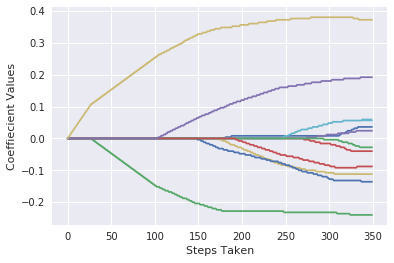

In [6]:
for i in range(n_cols):
    # plot range of beta values for each attribute
    coef_curve = [beta_mat[k][i] for k in range(n_steps)]
    x_axis = range(n_steps)
    plt.plot(x_axis, coef_curve)
    
plt.xlabel('Steps Taken')
plt.ylabel('Coeffiecient Values')
plt.show()
